In [8]:
import copy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
shot = 5
bs = 4
block = 1

aa = []
bb = []

for alg in ['baseline_body']:
    for d in ['miniImageNet', 'CropDisease', 'EuroSAT', 'ISIC', 'ChestX']: #, 'miniImageNet', 'CropDisease', 'EuroSAT', 'ISIC', 'ChestX']:
#         a = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_{}_aug/{}_5way{}shot_ft100_bs{}_freeze_subnetblock{}.csv'.format(alg, d, shot, bs, block), index_col=0)
#         a = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_{}_aug/{}_5way{}shot_ft100_bs4_reinitblock4_bodyfreeze.csv'.format(alg, d, shot), index_col=0)
        a = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_{}_prebs16_aug/{}_5way{}shot_ft100_bs4_reinitblock4_lottery.csv'.format(alg, d, shot), index_col=0)
        print ('lottery', d, '({}) {:4.2f} +- {:4.2f}'.format(alg, a.mean()[-1], 1.96*a.std()[-1]/np.sqrt(600.)))
        a = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_{}_prebs16_aug/{}_5way{}shot_ft100_bs4_reinitblock4.csv'.format(alg, d, shot), index_col=0)
        print ('random', d, '({}) {:4.2f} +- {:4.2f}'.format(alg, a.mean()[-1], 1.96*a.std()[-1]/np.sqrt(600.)))
        
        if alg == 'baseline':
            aa.append(a.mean()[-1])
        else:
            bb.append(a.mean()[-1])
#         print ('{:4.2f} +- {:4.2f}'.format(a.mean()[-1], 1.96*a.std()[-1]/np.sqrt(600.)), end=' & ')

lottery miniImageNet (baseline_body) 70.10 +- 0.62
random miniImageNet (baseline_body) 71.50 +- 0.62
lottery CropDisease (baseline_body) 90.24 +- 0.49
random CropDisease (baseline_body) 91.79 +- 0.45
lottery EuroSAT (baseline_body) 81.37 +- 0.62
random EuroSAT (baseline_body) 81.46 +- 0.62
lottery ISIC (baseline_body) 47.20 +- 0.60
random ISIC (baseline_body) 48.57 +- 0.57
lottery ChestX (baseline_body) 26.05 +- 0.42
random ChestX (baseline_body) 26.86 +- 0.43


In [120]:
d = ['miniImageNet', 'CropDisease', 'EuroSAT', 'ISIC', 'ChestX']

# aa = [51.44, 72.04, 67.50, 34.44, 22.44]
aa = [74.81, 91.87, 83.75, 51.03, 26.86]

plt.plot(d, aa, marker='o', label='re-randomization')
plt.plot(d, bb, marker='o', label='re-initialization')

plt.legend()
# plt.show()
plt.savefig('./src/5shot_randinit.pdf', bbox_inches='tight', format='pdf')
plt.close()

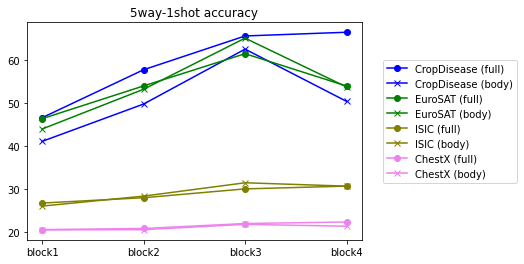

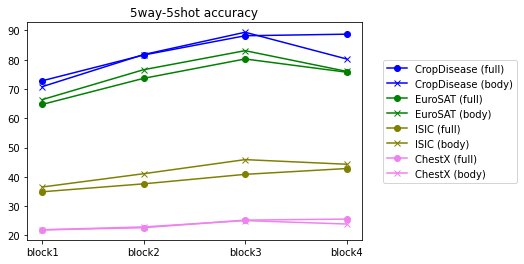

In [21]:
for shot in [1, 5]:

    if shot == 1:
        bs = 4
    elif shot == 5:
        bs = 4
    elif shot == 20:
        bs = 16
    elif shot == 50:
        bs = 32

    mini_full = []
    mini_body = []
    crop_full = []
    crop_body = []
    euro_full = []
    euro_body = []
    isic_full = []
    isic_body = []
    chest_full = []
    chest_body = []

    for block in [1,2,3,4]:
        for alg in ['baseline', 'baseline_body']:
            for d in ['miniImageNet', 'CropDisease', 'EuroSAT', 'ISIC', 'ChestX']: #, 'miniImageNet', 'CropDisease', 'EuroSAT', 'ISIC', 'ChestX']:
                a = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_{}_aug/{}_5way{}shot_ft100_bs{}_freeze_subnetblock{}.csv'.format(alg, d, shot, bs, block), index_col=0)
    #             print (d, '({}) {:4.2f} +- {:4.2f}'.format(alg, a.mean()[-1], 1.96*a.std()[-1]/np.sqrt(600.)))
    #             print ('{:4.2f} +- {:4.2f}'.format(a.mean()[-1], 1.96*a.std()[-1]/np.sqrt(600.)), end=' & ')
                if alg == 'baseline':
                    if d == 'miniImageNet':
                        mini_full.append(a.mean()[-1])
                    elif d == 'CropDisease':
                        crop_full.append(a.mean()[-1])
                    elif d == 'EuroSAT':
                        euro_full.append(a.mean()[-1])
                    elif d == 'ISIC':
                        isic_full.append(a.mean()[-1])
                    elif d == 'ChestX':
                        chest_full.append(a.mean()[-1])
                elif alg == 'baseline_body':
                    if d == 'miniImageNet':
                        mini_body.append(a.mean()[-1])
                    elif d == 'CropDisease':
                        crop_body.append(a.mean()[-1])
                    elif d == 'EuroSAT':
                        euro_body.append(a.mean()[-1])
                    elif d == 'ISIC':
                        isic_body.append(a.mean()[-1])
                    elif d == 'ChestX':
                        chest_body.append(a.mean()[-1])

    xrange = ['block1', 'block2', 'block3', 'block4']
    color_lst = ['red', 'blue', 'green', 'olive', 'violet']
    for idx, d in enumerate(['miniImageNet', 'CropDisease', 'EuroSAT', 'ISIC', 'ChestX']):
        if d == 'miniImageNet':
            tmp_full = mini_full
            tmp_body = mini_body
        elif d == 'CropDisease':
            tmp_full = crop_full
            tmp_body = crop_body
        elif d == 'EuroSAT':
            tmp_full = euro_full
            tmp_body = euro_body
        elif d == 'ISIC':
            tmp_full = isic_full
            tmp_body = isic_body
        elif d == 'ChestX':
            tmp_full = chest_full
            tmp_body = chest_body

        plt.plot(xrange, tmp_full, marker='o', color=color_lst[idx], label='{} (full)'.format(d))
        plt.plot(xrange, tmp_body, marker='x', color=color_lst[idx], label='{} (body)'.format(d))
    plt.legend(bbox_to_anchor=(1.05, 0.85))
    plt.title('5way-{}shot accuracy'.format(shot))
    plt.show()
    plt.close()

In [45]:
def dropna(arr, *args, **kwarg):
    assert isinstance(arr, np.ndarray)
    dropped=pd.DataFrame(arr).dropna(*args, **kwarg).values
    if arr.ndim==1:
        dropped=dropped.flatten()
    return dropped

In [ ]:
dataset = 'ChestX' # miniImageNet, CropDisease, EuroSAT, ISIC, ChestX
n_way = 5
n_shot = 5
ft = 100
bs = 4

alg1_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_body_aug/{}_{}way{}shot_ft{}_bs{}_Block4_C1B1(1.0).csv'.format(dataset,
                                                                                                               n_way,
                                                                                                               n_shot,
                                                                                                               ft,
                                                                                                               bs), index_col=0)
alg1_results = alg1_results.to_numpy()
alg1_results = dropna(alg1_results)

alg2_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_body_aug/{}_{}way{}shot_ft{}_bs{}_Block4_C2B2(1.0).csv'.format(dataset,
                                                                                                                    n_way,
                                                                                                                    n_shot,
                                                                                                                    ft,
                                                                                                                    bs), index_col=0)
alg2_results = alg2_results.to_numpy()
alg2_results = dropna(alg2_results)

alg3_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_body_aug/{}_{}way{}shot_ft{}_bs{}_Block4_C12(1.0).csv'.format(dataset,
                                                                                                                    n_way,
                                                                                                                    n_shot,
                                                                                                                    ft,
                                                                                                                    bs), index_col=0)
alg3_results = alg3_results.to_numpy()
alg3_results = dropna(alg3_results)

alg4_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_body_aug/{}_{}way{}shot_ft{}_bs{}_Block4_B12(1.0).csv'.format(dataset,
                                                                                                                    n_way,
                                                                                                                    n_shot,
                                                                                                                    ft,
                                                                                                                    bs), index_col=0)
alg4_results = alg4_results.to_numpy()
alg4_results = dropna(alg4_results)


alg5_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_body_aug/{}_{}way{}shot_ft{}_bs{}_Block4_C12B12(1.0).csv'.format(dataset,
                                                                                                                    n_way,
                                                                                                                    n_shot,
                                                                                                                    ft,
                                                                                                                    bs), index_col=0)
alg5_results = alg5_results.to_numpy()
alg5_results = dropna(alg5_results)


alg6_results = pd.read_csv('./logs/checkpoints/miniImageNet/ResNet10_baseline_body_aug/{}_{}way{}shot_ft{}_bs{}_Block4(1.0).csv'.format(dataset,
                                                                                                                    n_way,
                                                                                                                    n_shot,
                                                                                                                    ft,
                                                                                                                    bs), index_col=0)
alg6_results = alg6_results.to_numpy()
alg6_results = dropna(alg6_results)

# print (alg2_results.shape, alg3_results.shape, alg4_results.shape, alg5_results.shape, alg6_results.shape)
print (alg1_results.shape, alg2_results.shape, alg3_results.shape, alg4_results.shape, alg5_results.shape)

In [ ]:
def calc_mean_conf(df, change_into_max=False):
    mean_lst = np.mean(df, axis=0)
    conf_lst = 1.96*np.std(df, axis=0)/np.sqrt(600.)
#     conf_lst = np.std(df, axis=0)
    return mean_lst, conf_lst

def make_max_df(df):
    df_max = copy.deepcopy(df)
    for task_num, acc_lst in enumerate(df):
        for finetune_epoch, acc in enumerate(acc_lst):
            if finetune_epoch == 0:
                best_acc = acc
            else:
                if best_acc >= acc:
                    df_max[task_num, finetune_epoch] = best_acc
                else:
                    best_acc = acc
    return df_max

In [ ]:
alg1 = 'baseline_C1B1'
alg2 = 'baseline_C2B2'
alg3 = 'baseline_C12'
alg4 = 'baseline_B12'
alg5 = 'baseline_C12B12'
alg6 = 'baseline_All'

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

###

mean_lst, conf_lst = calc_mean_conf(alg1_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg1, mean_lst[-1], conf_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

# ### 

mean_lst, conf_lst = calc_mean_conf(alg2_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg2, mean_lst[-1], conf_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)
 
###

mean_lst, conf_lst = calc_mean_conf(alg3_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg3, mean_lst[-1], conf_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

### 
mean_lst, conf_lst = calc_mean_conf(alg4_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg4, mean_lst[-1], conf_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

###

mean_lst, conf_lst = calc_mean_conf(alg5_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg5, mean_lst[-1], conf_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

###

mean_lst, conf_lst = calc_mean_conf(alg6_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg6, mean_lst[-1], conf_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)


plt.tight_layout()
plt.title('dataset: {}'.format(dataset))
plt.legend(loc=4, fontsize=8)
plt.show()
plt.close()

---

# Max

In [ ]:
alg1 = 'baseline_SCC'
alg2 = 'baseline_SCB'
alg3 = 'baseline_SCCB'
alg4 = 'baseline_C1B1SCCB'
alg5 = 'baseline_C2B2SCCB'

fig, ax = plt.subplots(1, 1, figsize=(4, 4))

###

# alg1_max_results = make_max_df(alg1_results)
# mean_lst, conf_lst = calc_mean_conf(alg1_max_results)
# x = np.arange(1, len(mean_lst)+1)
# ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg1, mean_lst[-1], conf_lst[-1]))
# # ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)

# # ### 

# alg2_max_results = make_max_df(alg2_results)
# mean_lst, conf_lst = calc_mean_conf(alg2_max_results)
# x = np.arange(1, len(mean_lst)+1)
# ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg2, mean_lst[-1], conf_lst[-1]))
# # ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='b', alpha=.1)
 
# ###

# alg3_max_results = make_max_df(alg3_results)
# mean_lst, conf_lst = calc_mean_conf(alg3_max_results)
# x = np.arange(1, len(mean_lst)+1)
# ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg3, mean_lst[-1], conf_lst[-1]))
# # ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

# ### 

# alg4_max_results = make_max_df(alg4_results)
# mean_lst, conf_lst = calc_mean_conf(alg4_max_results)
# x = np.arange(1, len(mean_lst)+1)
# ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg4, mean_lst[-1], conf_lst[-1]))
# # ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)

###

alg5_max_results = make_max_df(alg5_results)
mean_lst, conf_lst = calc_mean_conf(alg5_max_results)
x = np.arange(1, len(mean_lst)+1)
ax.plot(x, mean_lst, label='{}, last acc: {:4.2f}±{:3.2f}'.format(alg5, mean_lst[-1], conf_lst[-1]))
# ax.fill_between(x, (mean_lst-conf_lst), (mean_lst+conf_lst), color='r', alpha=.1)


plt.tight_layout()
plt.title('dataset: {}'.format(dataset))
plt.legend(loc=4, fontsize=8)
plt.show()
plt.close()